In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # pretty matplotlib plots
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics

In [3]:
aapl = pd.read_table("datafiles/AAPL.csv",sep=',', parse_dates=True)
aapl.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,12/12/80,0.10032,0.10076,0.10032,0.10032,469033600,0.0,0
1,12/15/80,0.09553,0.09553,0.09509,0.09509,175884800,0.0,0
2,12/16/80,0.08855,0.08855,0.08811,0.08811,105728000,0.0,0
3,12/17/80,0.09029,0.09073,0.09029,0.09029,86441600,0.0,0
4,12/18/80,0.09291,0.09334,0.09291,0.09291,73449600,0.0,0


In [4]:
aapl.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10415,4/4/22,174.57001,178.49001,174.44000,178.44,76468400,0.0,0
10416,4/5/22,177.50000,178.30000,174.42000,175.06,73401800,0.0,0
10417,4/6/22,172.36000,173.63000,170.13000,171.83,89058800,0.0,0
10418,4/7/22,171.16000,173.36000,169.85001,172.14,77594700,0.0,0
10419,4/8/22,171.78000,171.78000,169.20000,170.09,76515900,0.0,0


In [5]:
aapl.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10420.000000,10420.000000,10420.000000,10420.000000,1.042000e+04,10420.000000,10420.000000
mean,13.513628,13.660789,13.368160,13.520843,3.319173e+08,0.000590,0.001631
std,30.328377,30.674950,29.992982,30.352131,3.392501e+08,0.009881,0.085952
min,0.038820,0.038820,0.038380,0.038380,0.000000e+00,0.000000,0.000000
25%,0.234970,0.240060,0.229442,0.234800,1.244682e+08,0.000000,0.000000
50%,0.386165,0.394490,0.380135,0.387735,2.196096e+08,0.000000,0.000000
75%,12.238988,12.410095,12.134210,12.290980,4.123518e+08,0.000000,0.000000
max,182.397620,182.707230,178.892080,181.778400,7.421641e+09,0.220000,7.000000


In [8]:
amzn = pd.read_csv("datafiles/AMZN.csv",sep=',', parse_dates=True)
amzn.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6268.000000,6268.000000,6268.000000,6268.000000,6.268000e+03,6268.0,6268.000000
mean,569.780306,576.158761,562.699480,569.567463,7.262914e+06,0.0,0.001117
std,924.354388,934.306678,913.064669,923.665943,7.104654e+06,0.0,0.052071
min,1.406250,1.447920,1.312500,1.395830,4.872000e+05,0.0,0.000000
25%,39.057500,39.850000,38.422500,39.100000,3.521100e+06,0.0,0.000000
50%,110.245000,112.840000,107.405000,109.660000,5.413950e+06,0.0,0.000000
75%,602.587495,608.837495,594.932478,601.437500,8.225500e+06,0.0,0.000000
max,3744.000000,3773.080080,3696.790040,3731.409910,1.043292e+08,0.0,3.000000


In [7]:
fb = pd.read_csv("datafiles/FB.csv",sep=',', parse_dates=True)
fb.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2490.000000,2490.000000,2490.000000,2490.000000,2.490000e+03,2490.0,2490.0
mean,147.436586,149.212301,145.643988,147.473839,3.088883e+07,0.0,0.0
std,89.642121,90.748530,88.579327,89.681769,2.744846e+07,0.0,0.0
min,18.080000,18.270000,17.550000,17.730000,5.913100e+06,0.0,0.0
25%,76.102500,76.915000,75.085000,76.087500,1.581948e+07,0.0,0.0
50%,139.915000,141.229995,139.019995,139.965005,2.245400e+07,0.0,0.0
75%,192.917493,195.225000,190.467500,192.985000,3.585770e+07,0.0,0.0
max,381.679990,384.329990,378.810000,382.179990,5.735764e+08,0.0,0.0


In [10]:
googl = pd.read_csv("datafiles/GOOGL.csv",sep=',', parse_dates=True)
googl.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4442.000000,4442.000000,4442.000000,4442.000000,4.442000e+03,4442.0,4442.000000
mean,698.318547,704.990766,691.241197,698.297157,6.432503e+06,0.0,0.000450
std,652.824025,659.025836,646.157651,652.793080,7.684924e+06,0.0,0.029978
min,49.644650,50.920920,48.028030,50.055050,4.656000e+05,0.0,0.000000
25%,248.721222,251.129882,246.014770,248.922673,1.693950e+06,0.0,0.000000
50%,435.808320,439.196685,433.548555,436.213715,3.763332e+06,0.0,0.000000
75%,1016.465012,1036.527525,1004.535002,1018.654998,7.968923e+06,0.0,0.000000
max,3025.000000,3030.929930,2977.979980,2996.770020,8.215117e+07,0.0,1.998000


In [11]:
msft = pd.read_csv("datafiles/MSFT.csv",sep=',', parse_dates=True)
msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9094.000000,9094.000000,9094.000000,9094.000000,9.094000e+03,9094.000000,9094.000000
mean,36.754816,37.131946,36.365665,36.764874,5.871409e+07,0.002291,0.001869
std,60.936857,61.522474,60.307378,60.954302,3.844341e+07,0.041397,0.059755
min,0.056110,0.058310,0.056110,0.057210,2.304000e+06,0.000000,0.000000
25%,2.694408,2.722872,2.637475,2.713590,3.455065e+07,0.000000,0.000000
50%,19.049830,19.255075,18.844880,19.058880,5.198380e+07,0.000000,0.000000
75%,29.483787,29.803110,29.105030,29.427575,7.258995e+07,0.000000,0.000000
max,344.620000,349.670010,342.200010,343.109990,1.031789e+09,3.080000,2.000000


In [12]:
# Get column names, which are the same for each of the five stocks in this analysis
aapl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [13]:
# Get the types of each of the columns. All stocks' datasets are formatted with the correct columns. Using AAPL  
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10420 entries, 0 to 10419
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10420 non-null  object 
 1   Open          10420 non-null  float64
 2   High          10420 non-null  float64
 3   Low           10420 non-null  float64
 4   Close         10420 non-null  float64
 5   Volume        10420 non-null  int64  
 6   Dividends     10420 non-null  float64
 7   Stock Splits  10420 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 651.4+ KB


In [14]:
aapl["Date"] = pd.to_datetime(aapl["Date"])
aapl["Date"]

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10415   2022-04-04
10416   2022-04-05
10417   2022-04-06
10418   2022-04-07
10419   2022-04-08
Name: Date, Length: 10420, dtype: datetime64[ns]

In [15]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.10032,0.10076,0.10032,0.10032,469033600,0.0,0
1,1980-12-15,0.09553,0.09553,0.09509,0.09509,175884800,0.0,0
2,1980-12-16,0.08855,0.08855,0.08811,0.08811,105728000,0.0,0
3,1980-12-17,0.09029,0.09073,0.09029,0.09029,86441600,0.0,0
4,1980-12-18,0.09291,0.09334,0.09291,0.09291,73449600,0.0,0


In [16]:
amzn["Date"] = pd.to_datetime(amzn["Date"])
amzn.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15,2.43750,2.50000,1.92708,1.95833,72156000,0,0
1,1997-05-16,1.96875,1.97917,1.70833,1.72917,14700000,0,0
2,1997-05-19,1.76042,1.77083,1.62500,1.70833,6106800,0,0
3,1997-05-20,1.72917,1.75000,1.63542,1.63542,5467200,0,0
4,1997-05-21,1.63542,1.64583,1.37500,1.42708,18853200,0,0


In [19]:
fb["Date"] = pd.to_datetime(fb["Date"])
fb.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.05,45.00,38.00,38.23,573576400,0,0
1,2012-05-21,36.53,36.66,33.00,34.03,168192700,0,0
2,2012-05-22,32.61,33.59,30.94,31.00,101786600,0,0
3,2012-05-23,31.37,32.50,31.36,32.00,73600000,0,0
4,2012-05-24,32.95,33.21,31.77,33.03,50237200,0,0


In [20]:
googl["Date"] = pd.to_datetime(googl["Date"])
googl.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19,50.05005,52.08208,48.02803,50.22022,44659096,0,0.0
1,2004-08-20,50.55556,54.59460,50.30030,54.20921,22834343,0,0.0
2,2004-08-23,55.43043,56.79680,54.57958,54.75475,18256126,0,0.0
3,2004-08-24,55.67567,55.85586,51.83684,52.48749,15247337,0,0.0
4,2004-08-25,52.53253,54.05405,51.99199,53.05305,9188602,0,0.0


In [21]:
msft["Date"] = pd.to_datetime(msft["Date"])
msft.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.05611,0.06436,0.05611,0.06161,1031788800,0.0,0.0
1,1986-03-14,0.06161,0.06491,0.06161,0.06381,308160000,0.0,0.0
2,1986-03-17,0.06381,0.06546,0.06381,0.06491,133171200,0.0,0.0
3,1986-03-18,0.06491,0.06546,0.06271,0.06326,67766400,0.0,0.0
4,1986-03-19,0.06326,0.06381,0.06161,0.06216,47894400,0.0,0.0


In [22]:
aapl['Year'] = pd.DatetimeIndex(aapl['Date']).year
amzn['Year'] = pd.DatetimeIndex(amzn['Date']).year
fb['Year'] = pd.DatetimeIndex(fb['Date']).year
googl['Year'] = pd.DatetimeIndex(googl['Date']).year
msft['Year'] = pd.DatetimeIndex(msft['Date']).year

In [23]:
aapl['Month'] = pd.DatetimeIndex(aapl['Date']).month
amzn['Month'] = pd.DatetimeIndex(amzn['Date']).month
fb['Month'] = pd.DatetimeIndex(fb['Date']).month
googl['Month'] = pd.DatetimeIndex(googl['Date']).month
msft['Month'] = pd.DatetimeIndex(msft['Date']).month

In [24]:
aapl['Day'] = pd.DatetimeIndex(aapl['Date']).day
amzn['Day'] = pd.DatetimeIndex(amzn['Date']).day
fb['Day'] = pd.DatetimeIndex(fb['Date']).day
googl['Day'] = pd.DatetimeIndex(googl['Date']).day
msft['Day'] = pd.DatetimeIndex(msft['Date']).day

In [25]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
0,1980-12-12,0.10032,0.10076,0.10032,0.10032,469033600,0.0,0,1980,12,12
1,1980-12-15,0.09553,0.09553,0.09509,0.09509,175884800,0.0,0,1980,12,15
2,1980-12-16,0.08855,0.08855,0.08811,0.08811,105728000,0.0,0,1980,12,16
3,1980-12-17,0.09029,0.09073,0.09029,0.09029,86441600,0.0,0,1980,12,17
4,1980-12-18,0.09291,0.09334,0.09291,0.09291,73449600,0.0,0,1980,12,18


In [26]:
# Get info on when each of these five companies first went public
print("Apple Inc. (AAPL):\t", aapl["Date"][0],
      "\nAmazon.com Inc. (AMZN):\t", amzn["Date"][0],
      "\nMeta/Facebook Inc. (FB):\t", fb["Date"][0],
      "\nAlphabet Inc./Google (GOOGL):\t", googl["Date"][0],
      "\nMicrosoft (MSFT):\t", msft["Date"][0]
     )

Apple Inc. (AAPL):	 1980-12-12 00:00:00 
Amazon.com Inc. (AMZN):	 1997-05-15 00:00:00 
Meta/Facebook Inc. (FB):	 2012-05-18 00:00:00 
Alphabet Inc./Google (GOOGL):	 2004-08-19 00:00:00 
Microsoft (MSFT):	 1986-03-13 00:00:00


In [27]:
# AAPL column type info; same is applicable for the other four stocks
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10420 entries, 0 to 10419
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10420 non-null  datetime64[ns]
 1   Open          10420 non-null  float64       
 2   High          10420 non-null  float64       
 3   Low           10420 non-null  float64       
 4   Close         10420 non-null  float64       
 5   Volume        10420 non-null  int64         
 6   Dividends     10420 non-null  float64       
 7   Stock Splits  10420 non-null  int64         
 8   Year          10420 non-null  int64         
 9   Month         10420 non-null  int64         
 10  Day           10420 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 895.6 KB


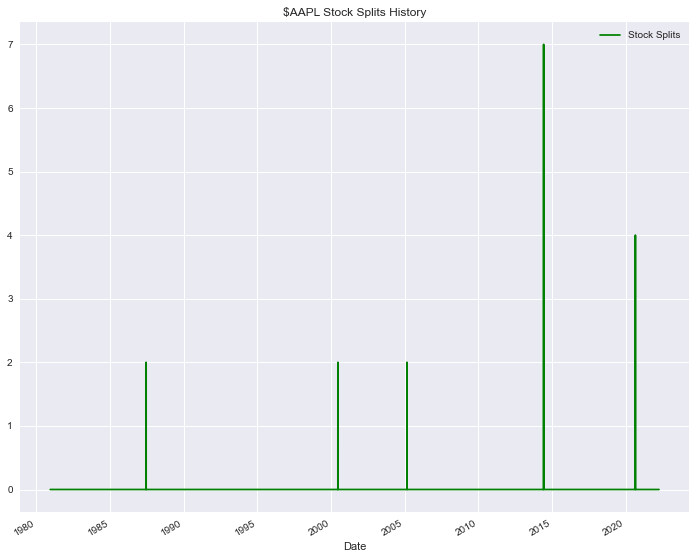

In [33]:
# AAPL stock splits
aapl.plot(x="Date", y="Stock Splits", color="green", kind="line", figsize=(12,10))
plt.title("$AAPL Stock Splits History")
plt.show()

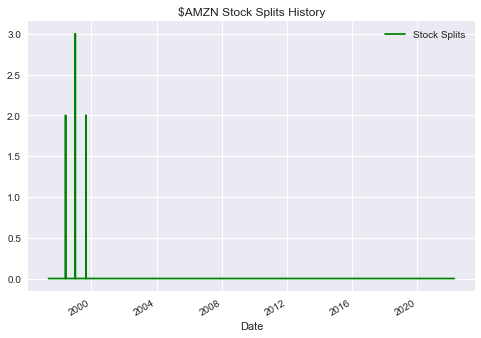

In [34]:
# AMZN stock splits
amzn.plot(x="Date", y="Stock Splits", color="green", kind="line")
plt.title("$AMZN Stock Splits History")
plt.show()

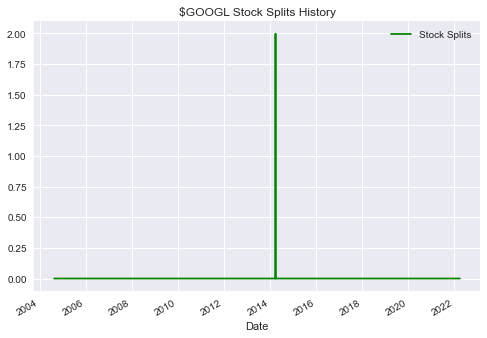

In [35]:
# Facebook has never experienced any stock splits, skip stock split analysis/visualization
# GOOGL stock split history
googl.plot(x="Date", y="Stock Splits", color="green", kind="line")
plt.title("$GOOGL Stock Splits History")
plt.show()

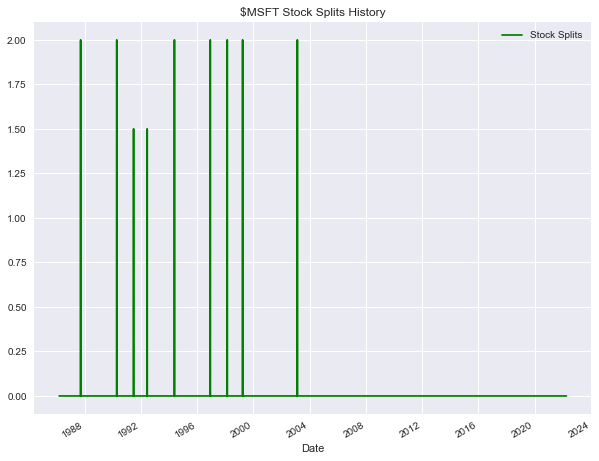

In [36]:
# MSFT stock splits
msft.plot(x="Date", y="Stock Splits", color="green", kind="line", figsize=(10,8))
plt.title("$MSFT Stock Splits History")
plt.show()

Time Series Analysis

Now, do visualizations of each of the five stocks' closing prices from their start to the latest date. The last recorded day of data for this set is April 8, 2022. We are doing analysis on each of the stocks' performances from 2010 to 2022; however, since Facebook (FB) and its stock did not go public via an IPO until May 2012, the initial 2010-2020 plan would therefore be ineffective because FB was not publicly traded in the years when Microsoft, Google, Apple, and Amazon all did prior to May 2012.

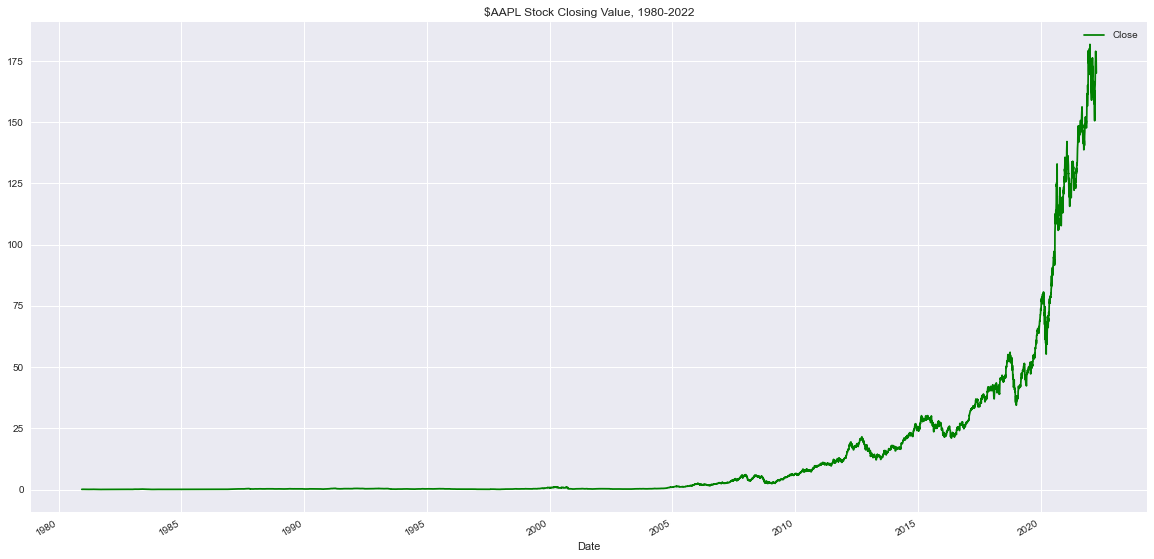

In [28]:
# AAPL - Apple
aapl.plot(x="Date", y="Close", color="green", kind="line", figsize=(20,10))
plt.title("$AAPL Stock Closing Value, 1980-2022")
plt.show()

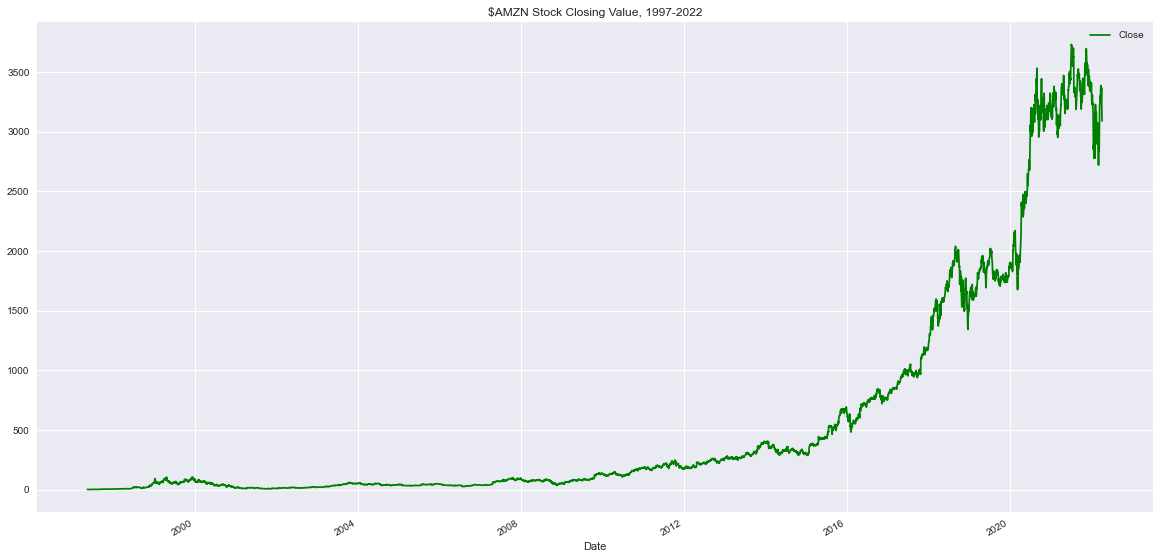

In [62]:
# AMZN - Amazon
amzn.plot(x="Date", y="Close", color="green", kind="line", figsize=(20,10))
plt.title("$AMZN Stock Closing Value, 1997-2022")
plt.show()

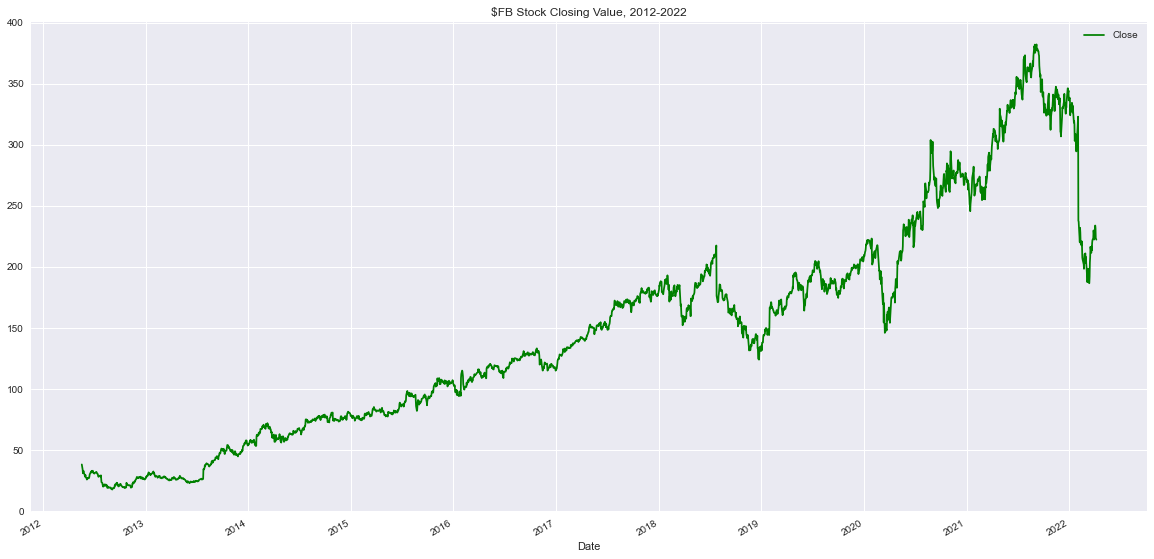

In [30]:
# FB - Facebook / Meta Inc. 
fb.plot(x="Date", y="Close", color="green", kind="line", figsize=(20,10))
plt.title("$FB Stock Closing Value, 2012-2022")
plt.show()

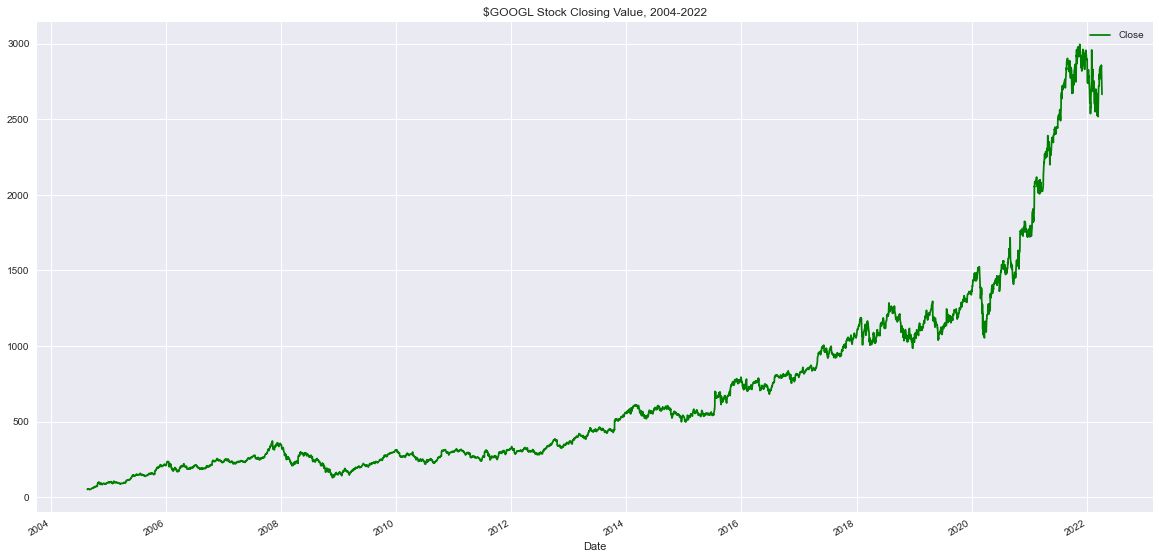

In [31]:
# GOOGL - Google
googl.plot(x="Date", y="Close", color="green", kind="line", figsize=(20,10))
plt.title("$GOOGL Stock Closing Value, 2004-2022")
plt.show()

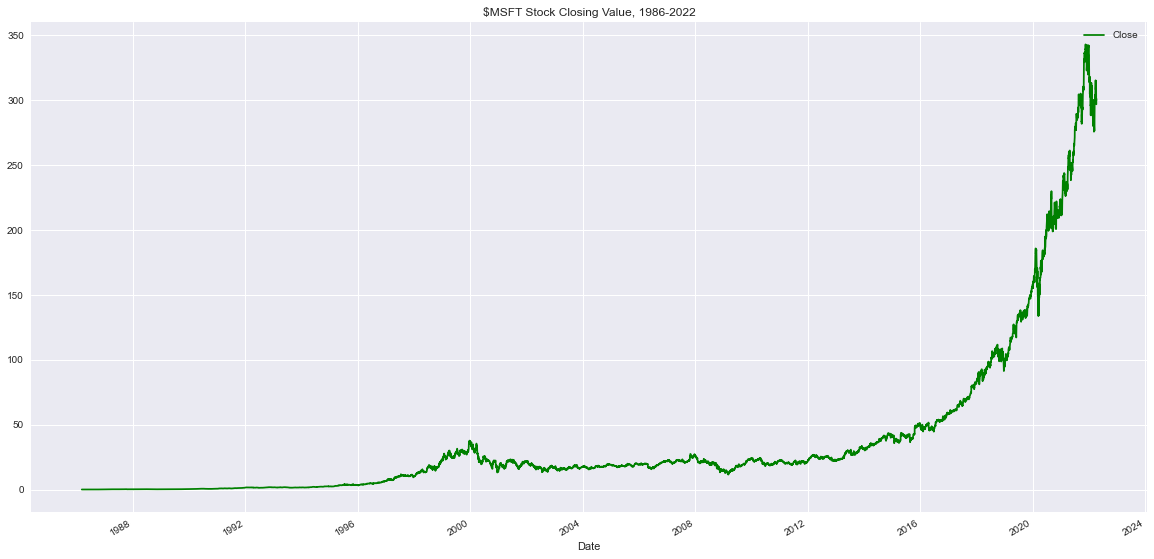

In [32]:
# MSFT - Microsoft 
msft.plot(x="Date", y="Close", color="green", kind="line", figsize=(20,10))
plt.title("$MSFT Stock Closing Value, 1986-2022")
plt.show()

Moving Averages for the Five Stocks

Break down each of the closing values of the five stocks into separate intervals by doing running averages of 7, 30, 90, and 120 trading days. 

In [33]:
# Rolling average every 7, 30, 90, 120 trading days days for Apple
aapl_wksample = aapl.rolling(7).mean()
aapl_wksample2 = aapl.rolling(30).mean()
aapl_wksample3 = aapl.rolling(90).mean()
aapl_wksample4 = aapl.rolling(120).mean()
aapl_wksample5 = aapl.rolling(1000).mean()

In [34]:
# Rolling average every 7, 30, 90, 120 trading days days for Amazon
amzn_wksample = amzn.rolling(7).mean()
amzn_wksample2 = amzn.rolling(30).mean()
amzn_wksample3 = amzn.rolling(90).mean()
amzn_wksample4 = amzn.rolling(120).mean()

In [35]:
# Rolling average every 7, 30, 90, 120 trading days days for Meta
fb_wksample = fb.rolling(7).mean()
fb_wksample2 = fb.rolling(30).mean()
fb_wksample3 = fb.rolling(90).mean()
fb_wksample4 = fb.rolling(120).mean()

In [36]:
# Rolling average every 7, 30, 90, 120 trading days days for Google
googl_wksample = googl.rolling(7).mean()
googl_wksample2 = googl.rolling(30).mean()
googl_wksample3 = googl.rolling(90).mean()
googl_wksample4 = googl.rolling(120).mean()

In [37]:
# Rolling average every 7, 30, 90, 120 trading days days for Microsoft
msft_wksample = msft.rolling(7).mean()
msft_wksample2 = msft.rolling(30).mean()
msft_wksample3 = msft.rolling(90).mean()
msft_wksample4 = msft.rolling(120).mean()

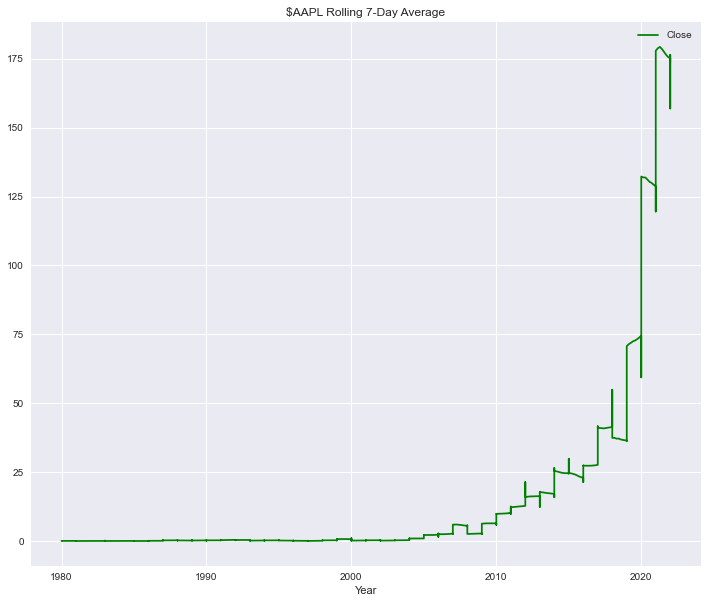

In [38]:
aapl_wksample.plot(x="Year", y="Close", color="green", kind="line", figsize=(12,10))
plt.title("$AAPL Rolling 7-Day Average")
plt.show()

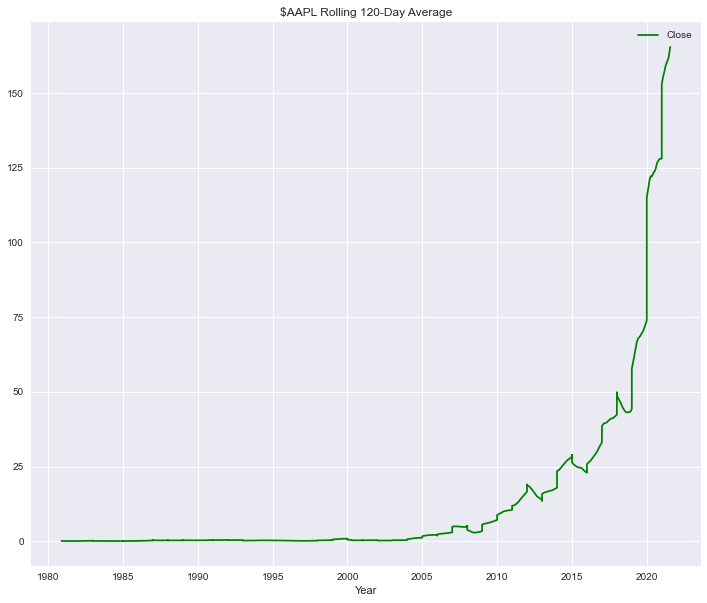

In [39]:
aapl_wksample4.plot(x="Year", y="Close", color="green", kind="line", figsize=(12,10))
plt.title("$AAPL Rolling 120-Day Average")
plt.show()

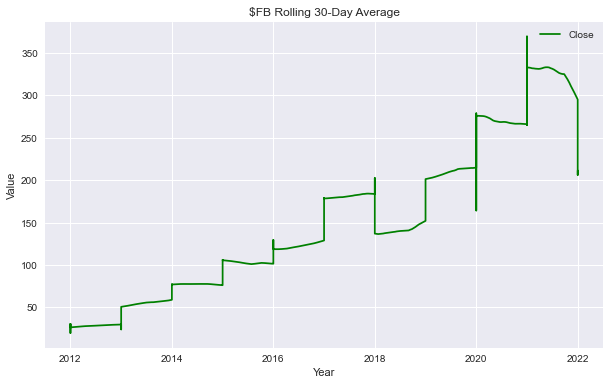

In [40]:
fb_wksample2.plot(x="Year", y="Close", color="green", kind="line", figsize=(10,6))
plt.title("$FB Rolling 30-Day Average")
plt.ylabel("Value")
plt.show()

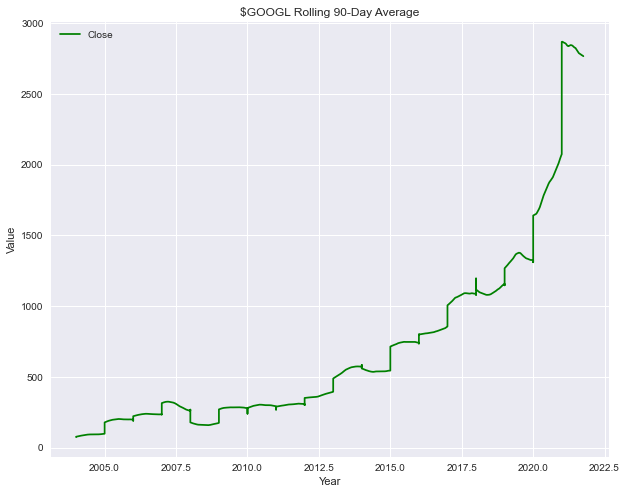

In [41]:
googl_wksample3.plot(x="Year", y="Close", color="green", kind="line", figsize=(10,8))
plt.ylabel("Value")
plt.title("$GOOGL Rolling 90-Day Average")
plt.show()

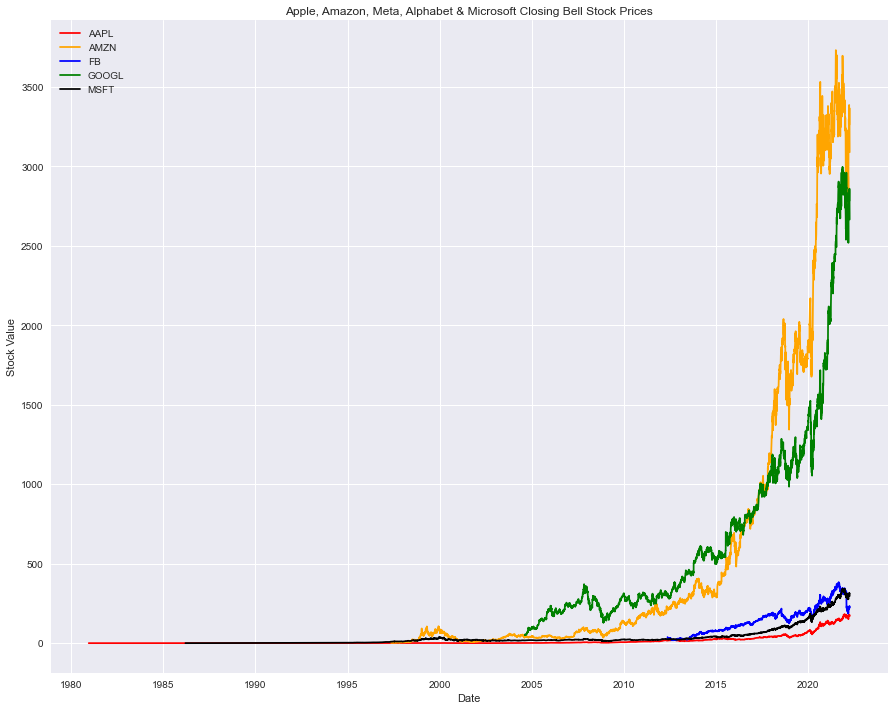

In [73]:
# Closing price of each stock
plt.figure(figsize=(15,12))
plt.plot(aapl["Date"], aapl["Close"], color="red")
plt.plot(amzn["Date"], amzn["Close"], color="orange")
plt.plot(fb["Date"], fb["Close"], color="blue")
plt.plot(googl["Date"], googl["Close"], color="green")
plt.plot(msft["Date"], msft["Close"], color="black")
plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.title("Apple, Amazon, Meta, Alphabet & Microsoft Closing Bell Stock Prices")
plt.legend(["AAPL", "AMZN", "FB", "GOOGL", "MSFT"])
plt.show()

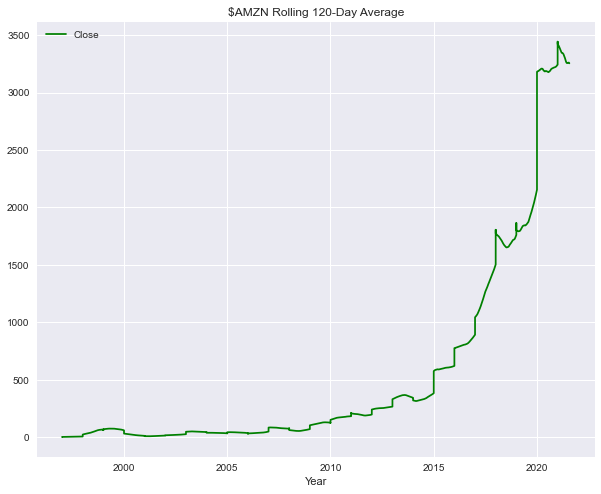

In [42]:
amzn_wksample4.plot(x="Year", y="Close", color="green", kind="line", figsize=(10,8))
plt.title("$AMZN Rolling 120-Day Average")
plt.show()

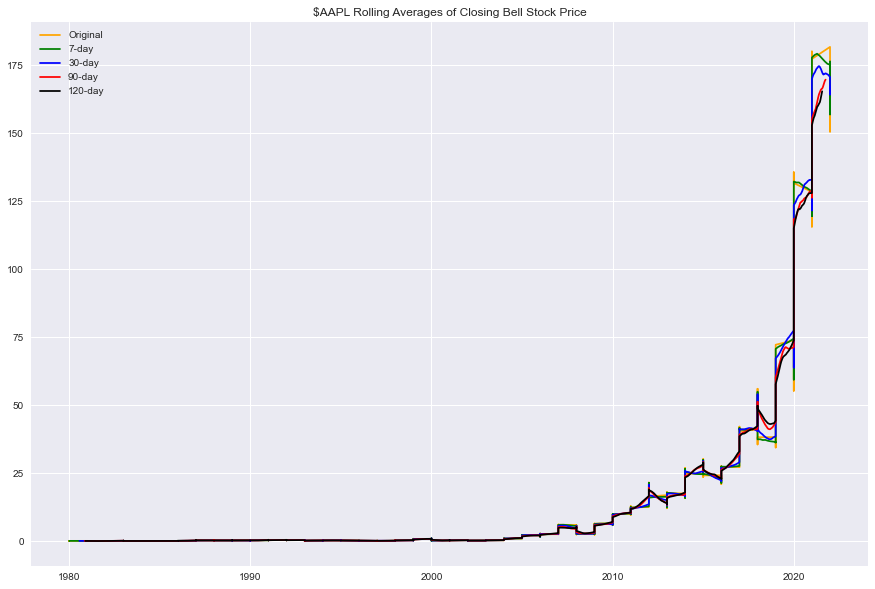

In [43]:
# All Apple rolling averages against original
plt.figure(figsize=(15,10))
plt.plot(aapl["Year"], aapl["Close"], color="orange")
plt.plot(aapl_wksample["Year"], aapl_wksample["Close"], color="green")
plt.plot(aapl_wksample2["Year"], aapl_wksample2["Close"], color="blue")
plt.plot(aapl_wksample3["Year"], aapl_wksample3["Close"], color="red")
plt.plot(aapl_wksample4["Year"], aapl_wksample4["Close"], color="black")
plt.legend(["Original", "7-day", "30-day", "90-day", "120-day"])
plt.title("$AAPL Rolling Averages of Closing Bell Stock Price")
plt.show()

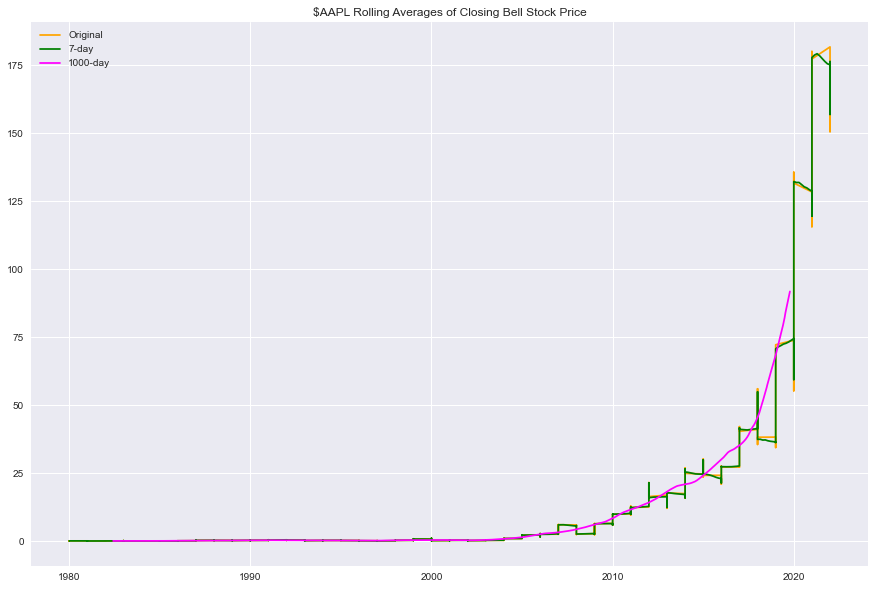

In [44]:
# All Apple rolling averages against original
plt.figure(figsize=(15,10))
plt.plot(aapl["Year"], aapl["Close"], color="orange")
plt.plot(aapl_wksample["Year"], aapl_wksample["Close"], color="green")
plt.plot(aapl_wksample5["Year"], aapl_wksample5["Close"], color="magenta")
plt.legend(["Original", "7-day", "1000-day"])
plt.title("$AAPL Rolling Averages of Closing Bell Stock Price")
plt.show()

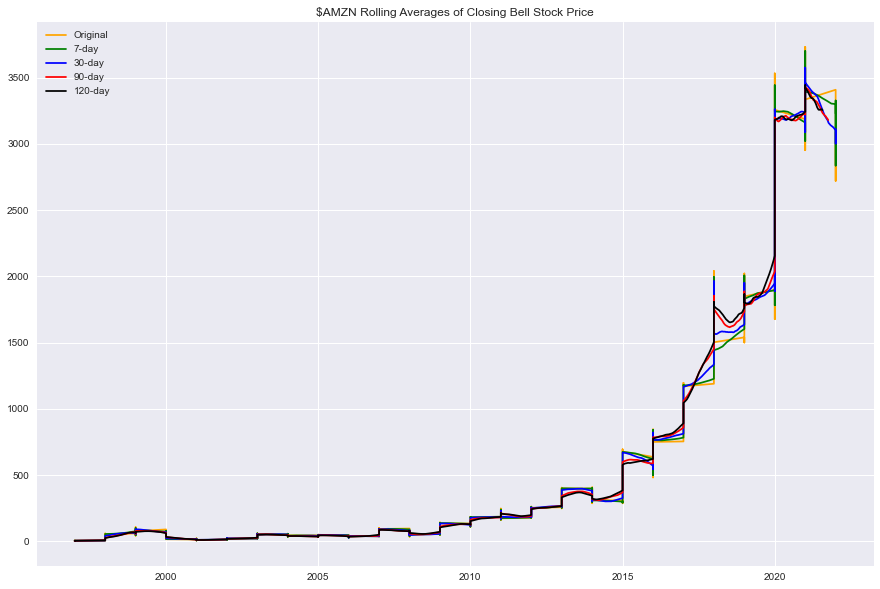

In [45]:
# All Amazon rolling averages against original
plt.figure(figsize=(15,10))
plt.plot(amzn["Year"], amzn["Close"], color="orange")
plt.plot(amzn_wksample["Year"], amzn_wksample["Close"], color="green")
plt.plot(amzn_wksample2["Year"], amzn_wksample2["Close"], color="blue")
plt.plot(amzn_wksample3["Year"], amzn_wksample3["Close"], color="red")
plt.plot(amzn_wksample4["Year"], amzn_wksample4["Close"], color="black")
plt.legend(["Original", "7-day", "30-day", "90-day", "120-day"])
plt.title("$AMZN Rolling Averages of Closing Bell Stock Price")
plt.show()

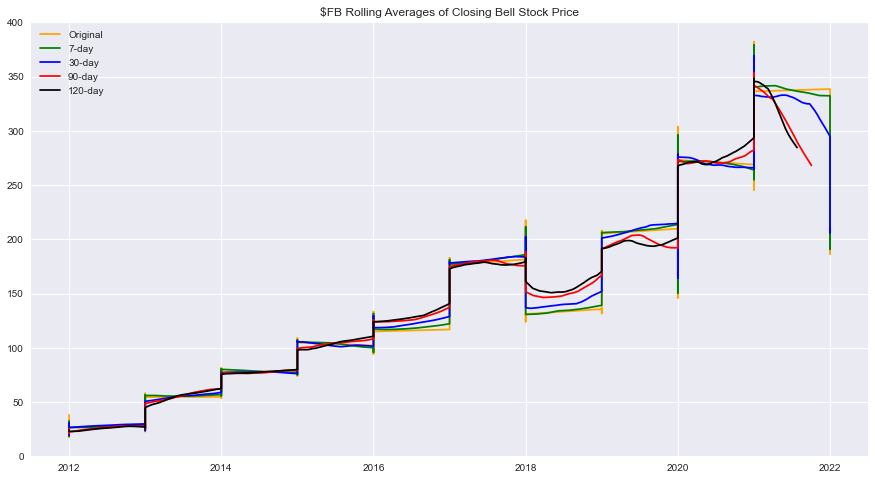

In [46]:
# All Facebook/Meta rolling averages against original
plt.figure(figsize=(15,8))
plt.plot(fb["Year"], fb["Close"], color="orange")
plt.plot(fb_wksample["Year"], fb_wksample["Close"], color="green")
plt.plot(fb_wksample2["Year"], fb_wksample2["Close"], color="blue")
plt.plot(fb_wksample3["Year"], fb_wksample3["Close"], color="red")
plt.plot(fb_wksample4["Year"], fb_wksample4["Close"], color="black")
plt.legend(["Original", "7-day", "30-day", "90-day", "120-day"])
plt.title("$FB Rolling Averages of Closing Bell Stock Price")
plt.show()

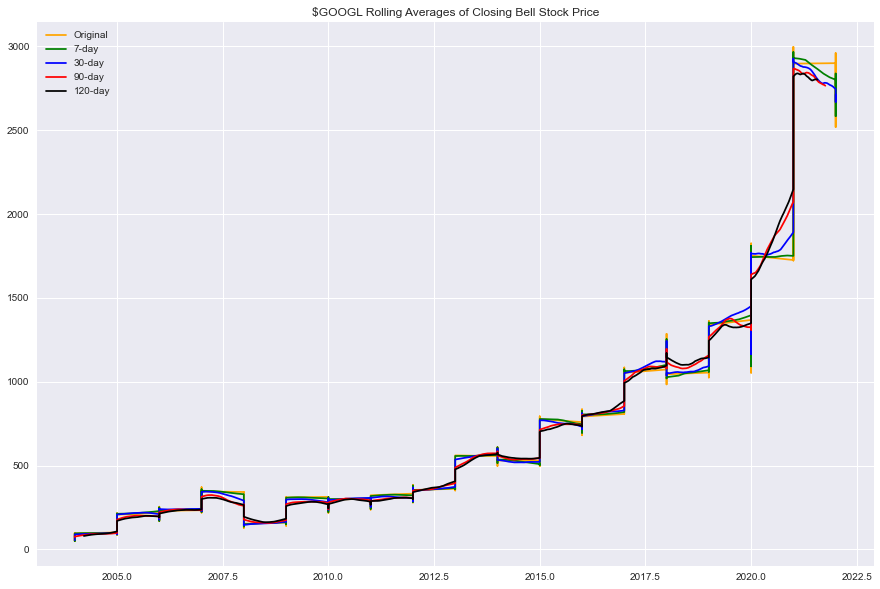

In [76]:
# All Google/Alphabet rolling averages against original
plt.figure(figsize=(15,10))
plt.plot(googl["Year"], googl["Close"], color="orange")
plt.plot(googl_wksample["Year"], googl_wksample["Close"], color="green")
plt.plot(googl_wksample2["Year"], googl_wksample2["Close"], color="blue")
plt.plot(googl_wksample3["Year"], googl_wksample3["Close"], color="red")
plt.plot(googl_wksample4["Year"], googl_wksample4["Close"], color="black")
plt.legend(["Original", "7-day", "30-day", "90-day", "120-day"])
plt.title("$GOOGL Rolling Averages of Closing Bell Stock Price")
plt.show()

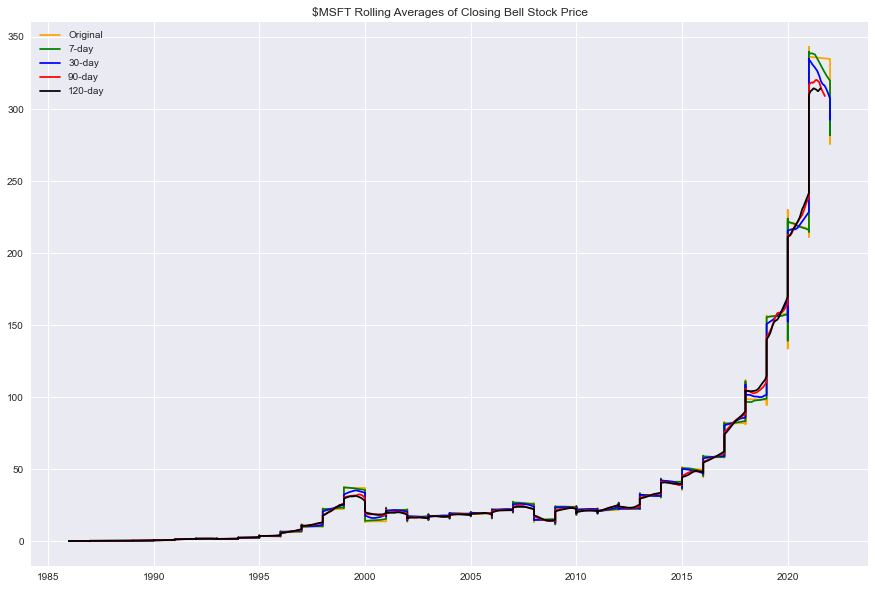

In [61]:
# All Microsoft rolling averages
plt.figure(figsize=(15,10))
plt.plot(msft["Year"], msft["Close"], color="orange")
plt.plot(msft_wksample["Year"], msft_wksample["Close"], color="green")
plt.plot(msft_wksample2["Year"], msft_wksample2["Close"], color="blue")
plt.plot(msft_wksample3["Year"], msft_wksample3["Close"], color="red")
plt.plot(msft_wksample4["Year"], msft_wksample4["Close"], color="black")
plt.legend(["Original", "7-day", "30-day", "90-day", "120-day"])
plt.title("$MSFT Rolling Averages of Closing Bell Stock Price")
plt.show()

ANOVA and correlation analysis

In [49]:
# Correlation on Apple data
aapl.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
Open,1.000000,0.999946,0.999930,0.999864,-0.194234,0.094513,0.015690,0.628176,0.002895,-0.002998
High,0.999946,1.000000,0.999914,0.999933,-0.193684,0.093867,0.015990,0.627841,0.002721,-0.002938
Low,0.999930,0.999914,1.000000,0.999931,-0.195107,0.094466,0.015665,0.628468,0.003077,-0.002864
Close,0.999864,0.999933,0.999931,1.000000,-0.194404,0.094167,0.015950,0.628097,0.002904,-0.002932
Volume,-0.194234,-0.193684,-0.195107,-0.194404,1.000000,-0.030388,0.001121,0.174383,-0.053327,-0.011085
Dividends,0.094513,0.093867,0.094466,0.094167,-0.030388,1.000000,-0.001133,0.081792,0.000126,-0.058040
Stock Splits,0.015690,0.015990,0.015665,0.015950,0.001121,-0.001133,1.000000,0.013423,-0.002850,0.006315
Year,0.628176,0.627841,0.628468,0.628097,0.174383,0.081792,0.013423,1.000000,-0.015708,-0.003211
Month,0.002895,0.002721,0.003077,0.002904,-0.053327,0.000126,-0.002850,-0.015708,1.000000,0.001188
Day,-0.002998,-0.002938,-0.002864,-0.002932,-0.011085,-0.058040,0.006315,-0.003211,0.001188,1.000000


In [50]:
# Correlation on Amazon data
amzn.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
Open,1.000000,0.999927,0.999909,0.999821,-0.247293,NaN,-0.012248,0.760236,0.002638,-0.001536
High,0.999927,1.000000,0.999888,0.999916,-0.246107,NaN,-0.012135,0.759920,0.002208,-0.001559
Low,0.999909,0.999888,1.000000,0.999917,-0.248531,NaN,-0.012252,0.760650,0.002739,-0.001431
Close,0.999821,0.999916,0.999917,1.000000,-0.247307,NaN,-0.012161,0.760422,0.002338,-0.001553
Volume,-0.247293,-0.246107,-0.248531,-0.247307,1.000000,NaN,0.081028,-0.415727,-0.000082,0.052249
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,-0.012248,-0.012135,-0.012252,-0.012161,0.081028,NaN,1.000000,-0.031600,-0.011507,-0.030490
Year,0.760236,0.759920,0.760650,0.760422,-0.415727,NaN,-0.031600,1.000000,-0.051581,-0.005103
Month,0.002638,0.002208,0.002739,0.002338,-0.000082,NaN,-0.011507,-0.051581,1.000000,0.000271
Day,-0.001536,-0.001559,-0.001431,-0.001553,0.052249,NaN,-0.030490,-0.005103,0.000271,1.000000


In [51]:
# Correlation on Meta data
fb.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
Open,1.000000,0.999786,0.999759,0.999530,-0.398457,NaN,NaN,0.938805,0.024184,-0.001633
High,0.999786,1.000000,0.999704,0.999772,-0.394552,NaN,NaN,0.939848,0.022718,-0.001357
Low,0.999759,0.999704,1.000000,0.999783,-0.403231,NaN,NaN,0.937976,0.024889,-0.001908
Close,0.999530,0.999772,0.999783,1.000000,-0.399307,NaN,NaN,0.938960,0.023444,-0.001905
Volume,-0.398457,-0.394552,-0.403231,-0.399307,1.000000,NaN,NaN,-0.417703,-0.029132,0.076626
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.938805,0.939848,0.937976,0.938960,-0.417703,NaN,NaN,1.000000,-0.127936,-0.013478
Month,0.024184,0.022718,0.024889,0.023444,-0.029132,NaN,NaN,-0.127936,1.000000,0.000604
Day,-0.001633,-0.001357,-0.001908,-0.001905,0.076626,NaN,NaN,-0.013478,0.000604,1.000000


In [52]:
# Correlation on Alphabet data
googl.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
Open,1.000000,0.999916,0.999904,0.999810,-0.452979,NaN,-0.002872,0.849378,-0.005792,-0.003948
High,0.999916,1.000000,0.999879,0.999904,-0.451996,NaN,-0.002657,0.849393,-0.006492,-0.004102
Low,0.999904,0.999879,1.000000,0.999915,-0.454540,NaN,-0.002909,0.849703,-0.004929,-0.003839
Close,0.999810,0.999904,0.999915,1.000000,-0.453380,NaN,-0.002915,0.849620,-0.005801,-0.004118
Volume,-0.452979,-0.451996,-0.454540,-0.453380,1.000000,NaN,-0.004715,-0.676100,-0.062025,0.010952
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,-0.002872,-0.002657,-0.002909,-0.002915,-0.004715,NaN,1.000000,0.003088,-0.011120,-0.021811
Year,0.849378,0.849393,0.849703,0.849620,-0.676100,NaN,0.003088,1.000000,-0.073974,-0.007125
Month,-0.005792,-0.006492,-0.004929,-0.005801,-0.062025,NaN,-0.011120,-0.073974,1.000000,0.002527
Day,-0.003948,-0.004102,-0.003839,-0.004118,0.010952,NaN,-0.021811,-0.007125,0.002527,1.000000


In [53]:
# Correlation on Microsoft data
msft.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
Open,1.000000,0.999942,0.999932,0.999869,-0.305045,0.034385,-0.014783,0.677474,0.002261,-0.001689
High,0.999942,1.000000,0.999904,0.999930,-0.303849,0.034226,-0.014740,0.677318,0.001771,-0.001717
Low,0.999932,0.999904,1.000000,0.999933,-0.306463,0.034491,-0.014807,0.677774,0.002855,-0.001700
Close,0.999869,0.999930,0.999933,1.000000,-0.305240,0.034352,-0.014700,0.677498,0.002339,-0.001796
Volume,-0.305045,-0.303849,-0.306463,-0.305240,1.000000,-0.016126,0.013137,-0.339625,-0.070622,0.016251
Dividends,0.034385,0.034226,0.034491,0.034352,-0.016126,1.000000,-0.001731,0.052174,0.009486,0.003762
Stock Splits,-0.014783,-0.014740,-0.014807,-0.014700,0.013137,-0.001731,1.000000,-0.027306,-0.010230,0.015462
Year,0.677474,0.677318,0.677774,0.677498,-0.339625,0.052174,-0.027306,1.000000,-0.027197,-0.003304
Month,0.002261,0.001771,0.002855,0.002339,-0.070622,0.009486,-0.010230,-0.027197,1.000000,-0.000709
Day,-0.001689,-0.001717,-0.001700,-0.001796,0.016251,0.003762,0.015462,-0.003304,-0.000709,1.000000


In [99]:
# ANOVA model - Compare closing share price to stock trade volume

# AAPL
formula = "Close ~ Volume"
model1 = ols(formula, aapl).fit()
aov_aapl = sm.stats.anova_lm(model1, typ=2)
print(aov_aapl)

                sum_sq       df           F        PR(>F)
Volume    3.627544e+05      1.0  409.189014  2.815764e-89
Residual  9.235769e+06  10418.0         NaN           NaN


In [81]:
# AMZN
model2 = ols(formula, amzn).fit()
aov_amzn = sm.stats.anova_lm(model2, typ=2)
print(aov_amzn)

                sum_sq      df           F        PR(>F)
Volume    3.270108e+08     1.0  408.198813  5.464167e-88
Residual  5.019735e+09  6266.0         NaN           NaN


In [82]:
# FB
model3 = ols(formula, fb).fit()
aov_fb = sm.stats.anova_lm(model3, typ=2)
print(aov_fb)

                sum_sq      df           F        PR(>F)
Volume    3.191891e+06     1.0  471.954195  5.768844e-96
Residual  1.682669e+07  2488.0         NaN           NaN


In [83]:
# GOOGL
model4 = ols(formula, googl).fit()
aov_googl = sm.stats.anova_lm(model4, typ=2)
print(aov_googl)

                sum_sq      df            F         PR(>F)
Volume    3.890060e+08     1.0  1148.795156  3.674452e-224
Residual  1.503476e+09  4440.0          NaN            NaN


In [84]:
# MSFT
model5 = ols(formula, msft).fit()
aov_msft= sm.stats.anova_lm(model5, typ=2)
print(aov_msft)

                sum_sq      df           F         PR(>F)
Volume    3.147730e+06     1.0  934.147888  2.226396e-195
Residual  3.063665e+07  9092.0         NaN            NaN
